In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [2]:
df.shape

(26967, 11)

In [3]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('*'*45)

cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64
*********************************************
color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64
*********************************************
clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64
*********************************************


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [10]:
df.select_dtypes(include='number').skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

<IPython.core.display.Javascript object>

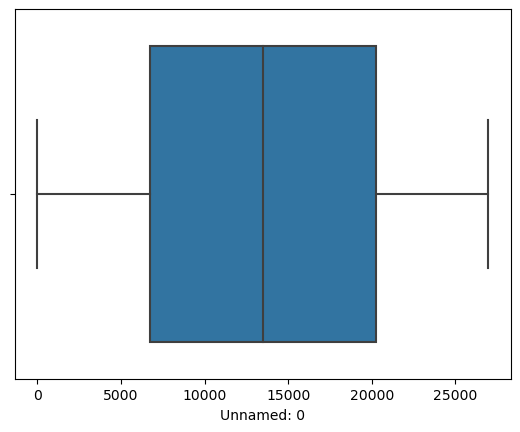

<IPython.core.display.Javascript object>

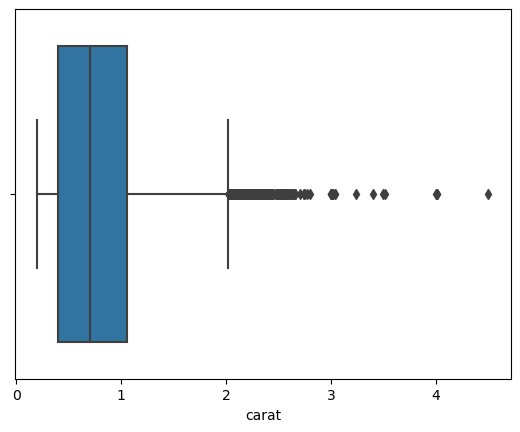

<IPython.core.display.Javascript object>

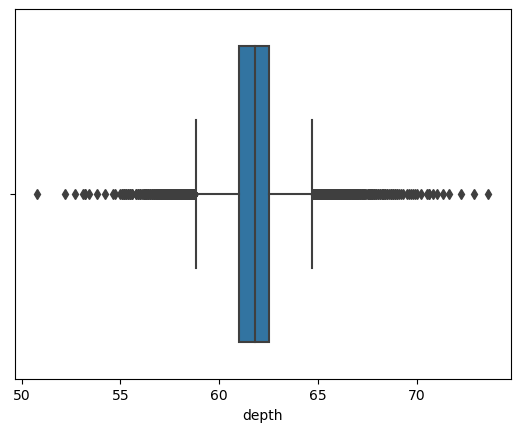

<IPython.core.display.Javascript object>

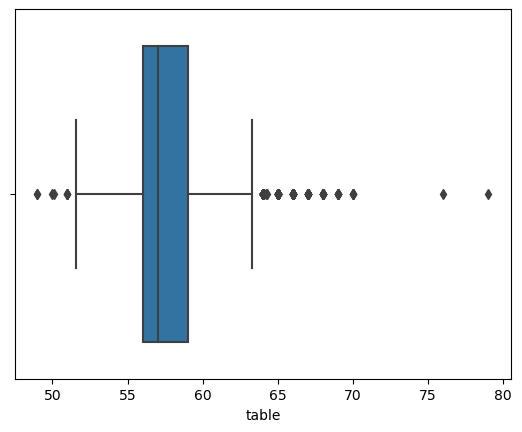

<IPython.core.display.Javascript object>

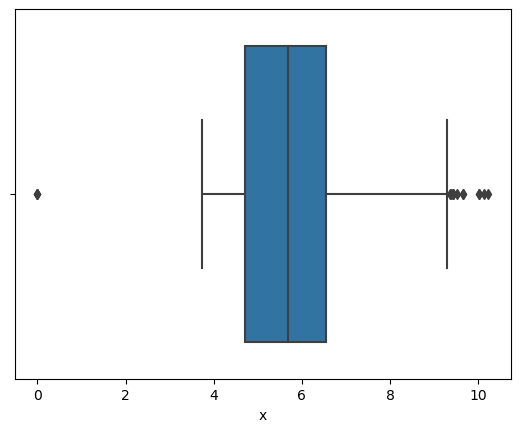

<IPython.core.display.Javascript object>

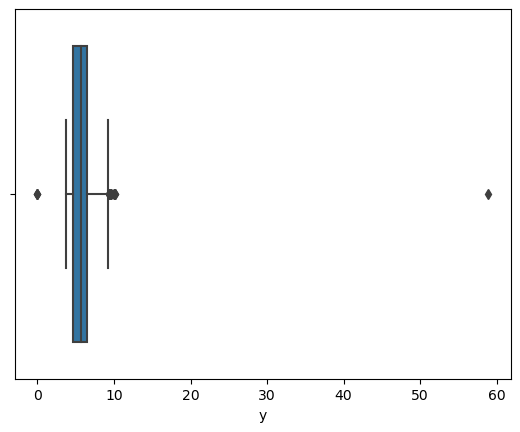

<IPython.core.display.Javascript object>

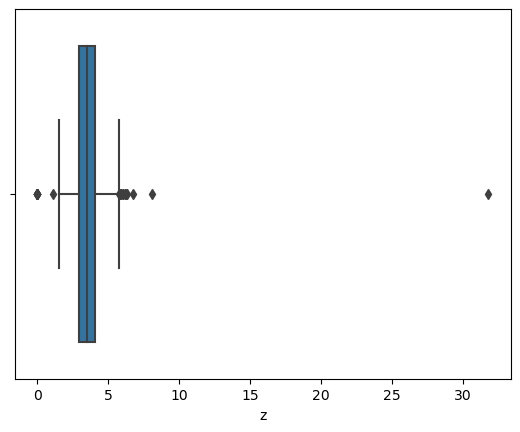

<IPython.core.display.Javascript object>

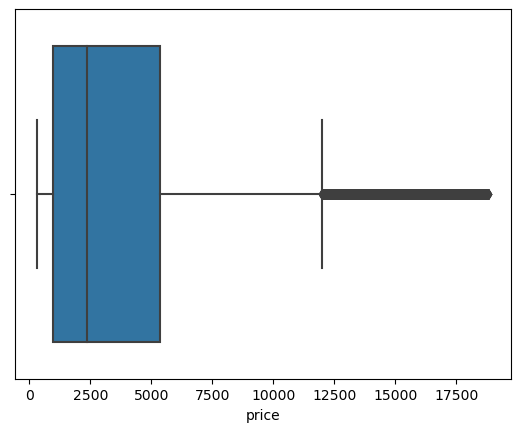

In [3]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data = df, x = i)
    plt.show()

In [37]:
# Boxcox Transformation

from scipy import stats

transformed_price, lmd = stats.boxcox(df['price'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Density'>

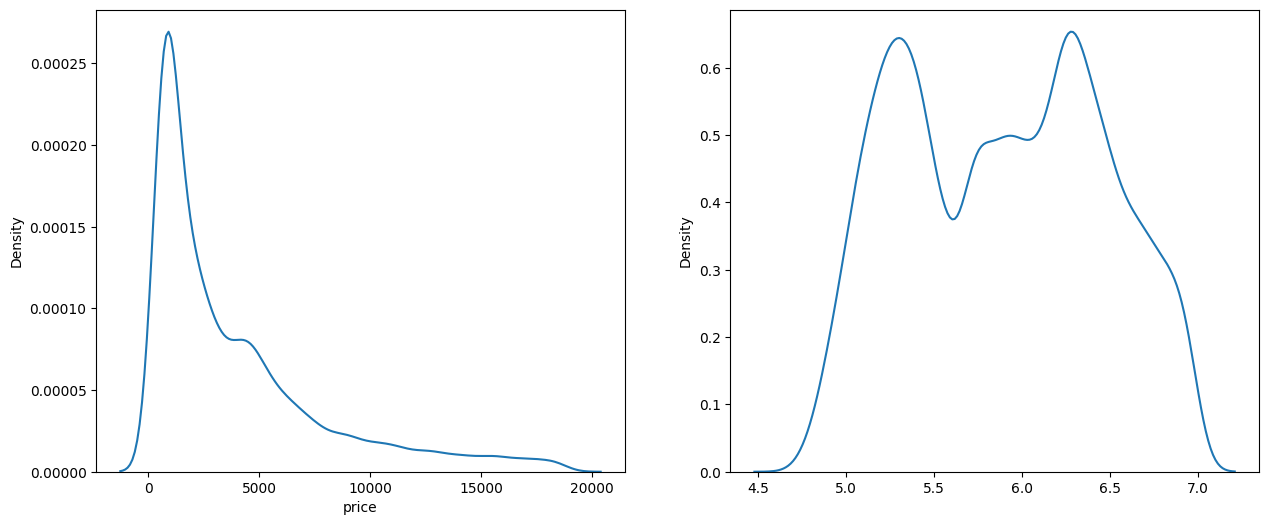

In [38]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
sns.kdeplot(data = df, x = 'price')

plt.subplot(1,2,2)
sns.kdeplot(transformed_price)

In [18]:
pd.DataFrame(transformed_price, columns=['transformed_price']).skew()

transformed_price    0.028703
dtype: float64

In [22]:
df.isnull().sum() / len(df)

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
x          0.0
y          0.0
z          0.0
price      0.0
dtype: float64

In [21]:
df.dropna(inplace=True)

In [27]:
sum(df['z'] == 0)

9

In [31]:
df['x'].replace(0, np.nan, inplace=True)
df['y'].replace(0, np.nan, inplace=True)
df['z'].replace(0, np.nan, inplace=True)

df.dropna(inplace=True)

In [32]:
df['y'].sort_values(ascending=False)

25795    58.90
12500    10.16
20505    10.10
3025      9.94
8156      9.94
         ...  
12748     3.77
20093     3.77
19108     3.72
13051     3.71
5788      3.71
Name: y, Length: 26261, dtype: float64

In [33]:
df['z'].sort_values(ascending=False)

25795    8.06
12500    6.72
8156     6.31
12758    6.27
3025     6.24
         ... 
12748    2.26
25498    2.24
26819    2.06
4828     1.53
21604    1.07
Name: z, Length: 26261, dtype: float64

In [34]:
df['y'].replace(58.9, 10.16, inplace=True)
df['z'].replace(8.06, 6.72, inplace=True)

In [39]:
df['transformed_price'] = transformed_price
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,transformed_price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499,4.976995
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984,5.394522
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289,6.433435
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082,5.451242
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779,5.253242


In [41]:
dummies = pd.get_dummies(data = df, drop_first=True)

In [48]:
X = dummies.drop(['price', 'transformed_price'], axis=1)
y = dummies['transformed_price']

In [49]:
import statsmodels.api as sm

X = sm.add_constant(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
model = sm.OLS(y_train, X_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      transformed_price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.441e+04
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:09:37   Log-Likelihood:                 21323.
No. Observations:               18382   AIC:                        -4.260e+04
Df Residuals:                   18358   BIC:                        -4.241e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.3781      0.097     -3.886      0.000      -0.569      -0.187
carat            -0.7368      0.006   -123.364      0.000      -0.749      -0.725
depth             0.0210      0.001     14.220      0.000       0.018       0.024
table             0.0060      0.000     17.655      0.000       0.005       0.007
x                 0.5281      0.012     44.865      0.000       0.505       0.551
y                 0.1378      0.013     10.793      0.000       0.113       0.163
z                 0.3014      0.023     13.034      0.000       0.256       0.347
cut_Good          0.0409      0.004     10.401      0.000       0.033       0.049
cut_Ideal         0.0800      0.004     20.493      0.000       0.072       0.088
cut_Premium       0.0605      0.004     16.294      0.000       0.053       0.068
cut_Very Good     0.0564      0.004     14.864      0.000       0.049       0.064
color_E          -0.0319      0.002    -15.530      0.000      -0.036      -0.028
color_F          -0.0553      0.002    -26.490      0.000      -0.059      -0.051
color_G          -0.0947      0.002    -46.628      0.000      -0.099      -0.091
color_H          -0.1458      0.002    -67.049      0.000      -0.150      -0.141
color_I          -0.2127      0.002    -87.679      0.000      -0.217      -0.208
color_J          -0.2880      0.003    -96.683      0.000      -0.294      -0.282
clarity_IF        0.6022      0.006    102.153      0.000       0.591       0.614
clarity_SI1       0.3073      0.005     61.058      0.000       0.297       0.317
clarity_SI2       0.2145      0.005     42.428      0.000       0.205       0.224
clarity_VS1       0.4262      0.005     83.043      0.000       0.416       0.436
clarity_VS2       0.3883      0.005     76.738      0.000       0.378       0.398
clarity_VVS1      0.5439      0.005     99.994      0.000       0.533       0.555
clarity_VVS2      0.5018      0.005     94.992      0.000       0.491       0.512
==============================================================================
Omnibus:                     1041.002   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4413.269
Skew:                           0.029   Prob(JB):                         0.00
Kurtosis:                       5.400   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
from sklearn import metrics

pred = model.predict(X_test)

In [52]:
metrics.mean_squared_error(y_test, pred) ** 0.5

0.0777542162540772

In [ ]:
# compare it against the maximum error
# max_error = when the prediction is average of y

In [57]:
rmse = pd.DataFrame(y_test)

In [58]:
rmse['pred'] = y_train.mean()
rmse

,transformed_price,pred
23420,6.312483,5.886714
18892,5.862258,5.886714
15627,5.248524,5.886714
20776,5.526242,5.886714
14188,6.213928,5.886714
...,...,...
23640,6.385922,5.886714
25203,5.500180,5.886714
7496,5.014913,5.886714
9670,6.157933,5.886714


In [59]:
metrics.mean_squared_error(rmse['transformed_price'], 
                          rmse['pred']) ** 0.5

0.5696236795138544

In [60]:
0.0777542162540772/0.5696236795138544

0.13650102523904303

In [ ]:
# assumptions
# 1. residual mean = 0
# 2. residual dist should be normal
# 3. residual should have constant variance

In [61]:
residual = y_test-pred

In [62]:
residual.mean()

-0.0012194276541843563

<Axes: ylabel='Density'>

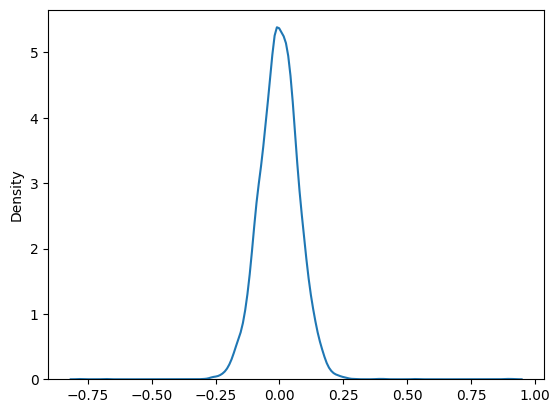

In [63]:
sns.kdeplot(residual)

<IPython.core.display.Javascript object>

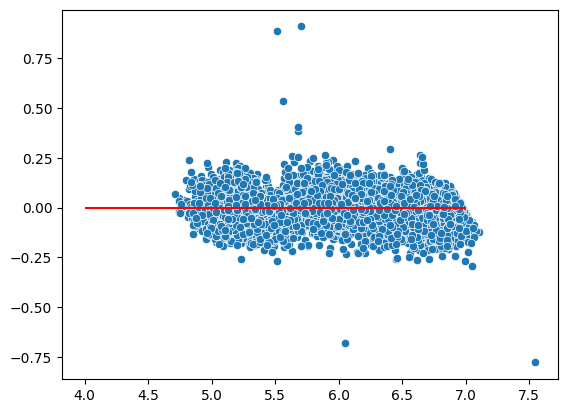

In [66]:
sns.scatterplot(x = pred, y = residual)
plt.hlines(0, 4, 7, colors = 'red')